# **Trabalho da Disciplina de Programação em R da Pós Graduação de Ciência de Dados da Unicarioca**

**Silvio Cesar de Santana    Matr.: 2017103163**

**Prof: Sergio Assuncao Monteiro, DSc**


# **Início**

**Instalando e Utilizando Bibliotecas**

In [114]:
install.packages (c("quantmod","TTR"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [115]:
library("quantmod","TTR")

**Selecionando Ativo para baixar dados**

In [116]:
 ativo <- "BBDC4.SA" #(BRADESCO PN N1)
# Definindo o período desejado
inicio <- "2019-01-01"
final <- as.character(Sys.Date())  # Data atual
getSymbols(ativo, src = "yahoo", from=inicio,to=final)

[1] "BBDC4.SA"

In [117]:
# Exibindo o dataframe dos preços ajustados
bradesco <- na.omit(Ad(get(ativo)))
head(bradesco)

           BBDC4.SA.Adjusted
2019-01-02          19.65014
2019-01-03          19.84920
2019-01-04          19.69344
2019-01-07          19.92708
2019-01-08          20.04877
2019-01-09          20.39435

# Visualizações

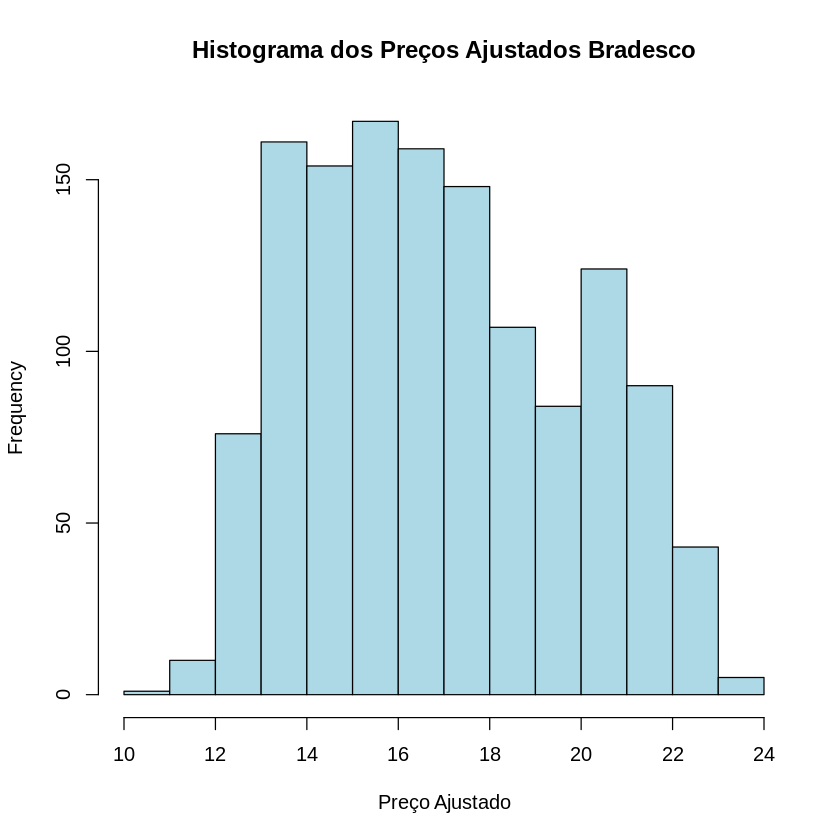

In [101]:
# Criando o histograma dos preços ajustados
hist(bradesco, main = "Histograma dos Preços Ajustados Bradesco", xlab = "Preço Ajustado", col = "lightblue")

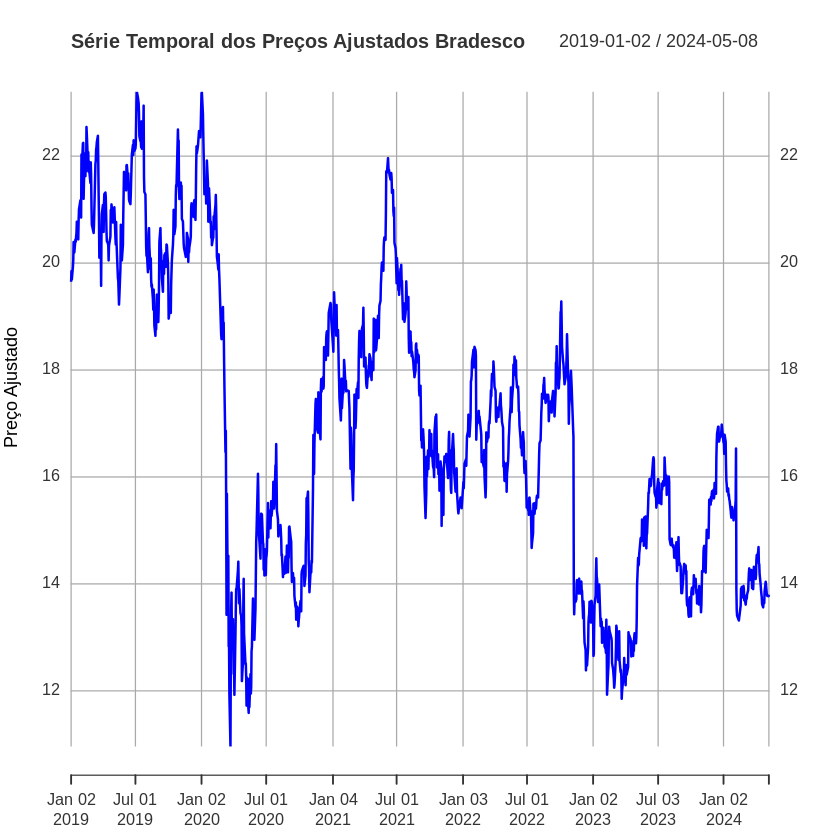

In [102]:
# Criando a série temporal dos preços ajustados
plot(bradesco, main = "Série Temporal dos Preços Ajustados Bradesco", ylab = "Preço Ajustado", col = "blue")

**Visualização Gráfico de linha**

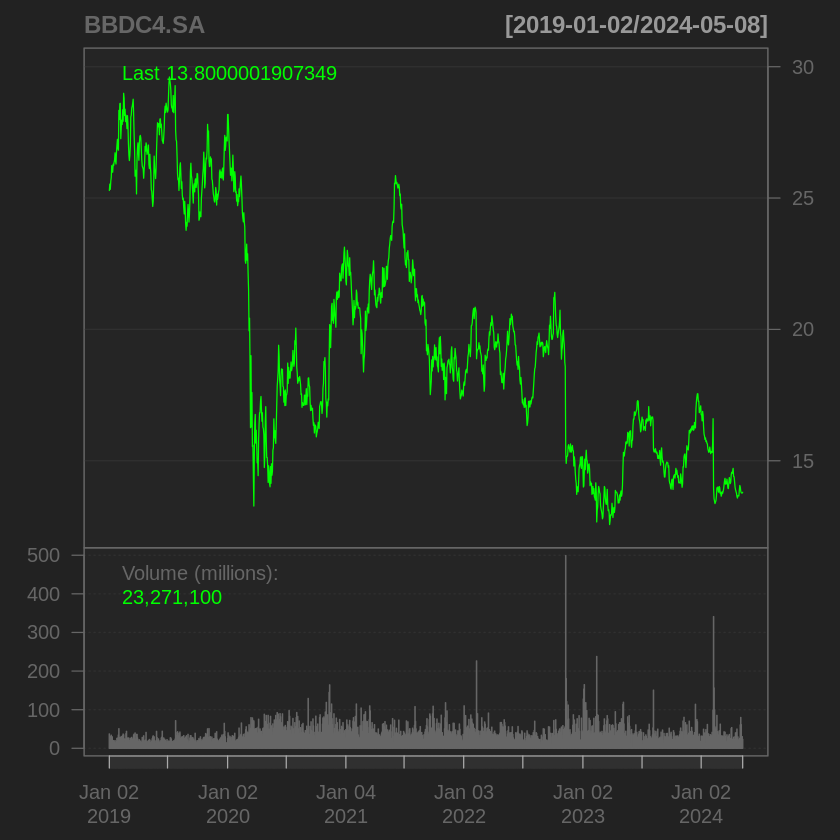

In [85]:
chartSeries(BBDC4.SA,
            type="line",
            theme=chartTheme('black'))

**Visualização gráfico Candlesticks**

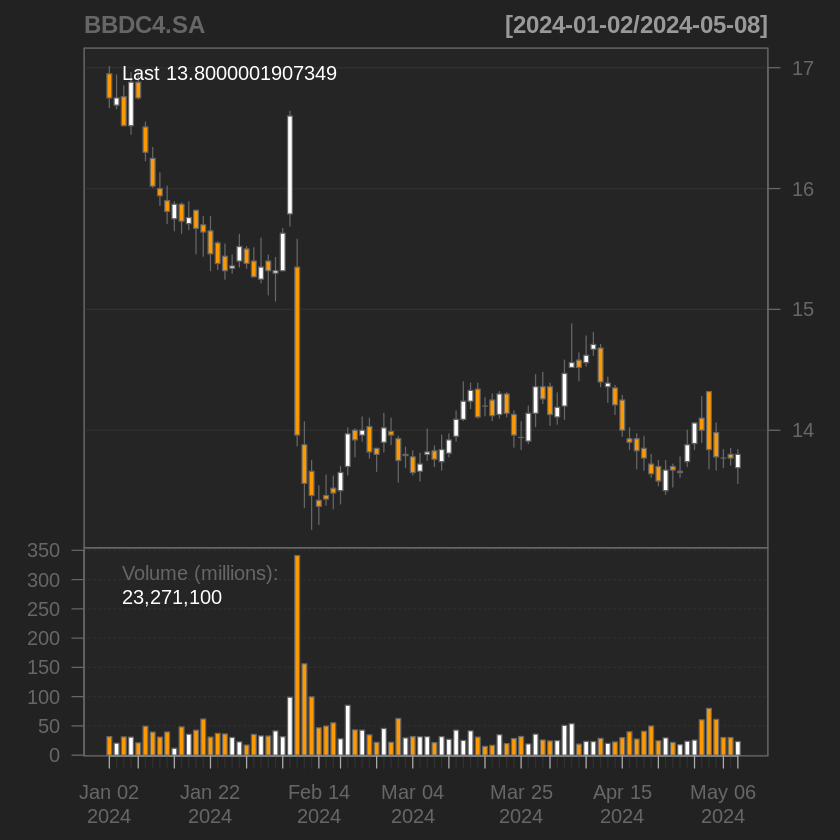

In [86]:
chartSeries(BBDC4.SA,
            type="candlesticks",
            subset='2024-01::2024-05',,
            up.col = 'white',
            down.col = 'yellow',
            theme=chartTheme('black'))

**Visualização Período Abril/2024**

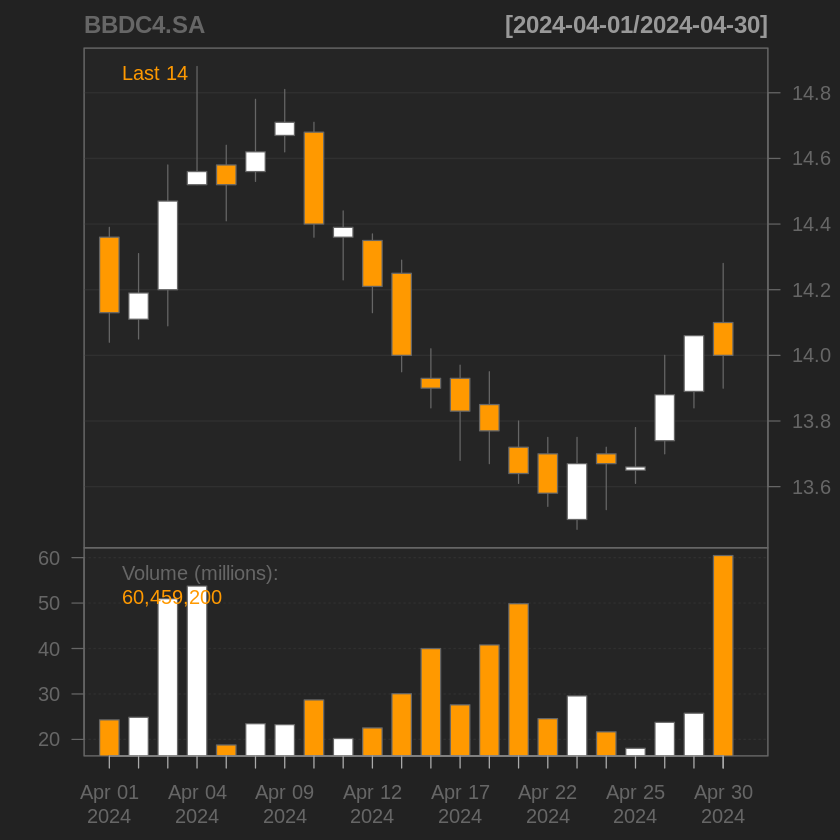

In [87]:
chartSeries(BBDC4.SA,
            type="candlesticks",
            subset='2024-04',
            up.col = 'white',
            down.col = 'yellow',
            theme=chartTheme('black'))

# Média Móvel Simples (SMA)

É a média aritmética dos preços dos últimos n dias

**Sinal de negociação**

```
O sinal de compra surge quando um SMA de curto prazo cruza de baixo para cima um SMA de longo prazo.
O sinal de venda surge quando um SMA de curto prazo cruza de cima para cima um SMA de longo prazo.
```

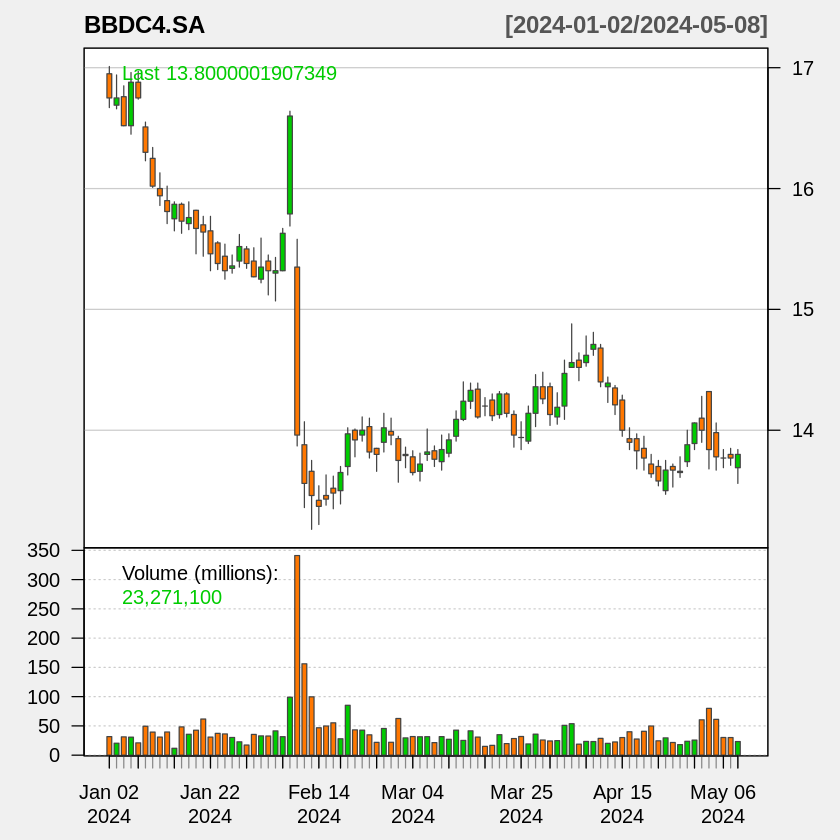

In [123]:
# Gráfico período de Janeiro/24 a Maio/2024
chartSeries(BBDC4.SA,
            subset='2024-01::2024-05',
            theme=chartTheme('white'))

In [124]:
# Verificando a estrutura dos dados baixados
str(BBDC4.SA)

# Extraindo os preços ajustados
precos_ajustados <- Cl(BBDC4.SA)

An xts object on 2019-01-02 / 2024-05-08 containing: 
  Data:    double [1329, 8]
  Columns: BBDC4.SA.Open, BBDC4.SA.High, BBDC4.SA.Low, BBDC4.SA.Close, BBDC4.SA.Volume ... with 3 more columns
  Index:   Date [1329] (TZ: "UTC")
  xts Attributes:
    $ src    : chr "yahoo"
    $ updated: POSIXct[1:1], format: "2024-05-09 14:40:03"


In [125]:
# Cálculo médias móveis( 20 e 50 dias)
sma20 <-SMA(precos_ajustados,n=20)
sma50 <-SMA(precos_ajustados,n=50)

In [126]:
# Calculando os envelopes de Bollinger
n <- 20  # Período para os envelopes de Bollinger
BBDC4.SA$SDB <- BBands(precos_ajustados, n = n, maType = "SMA", sd = 2)$dn
BBDC4.SA$SDT <- BBands(precos_ajustados, n = n, maType = "SMA", sd = 2)$up

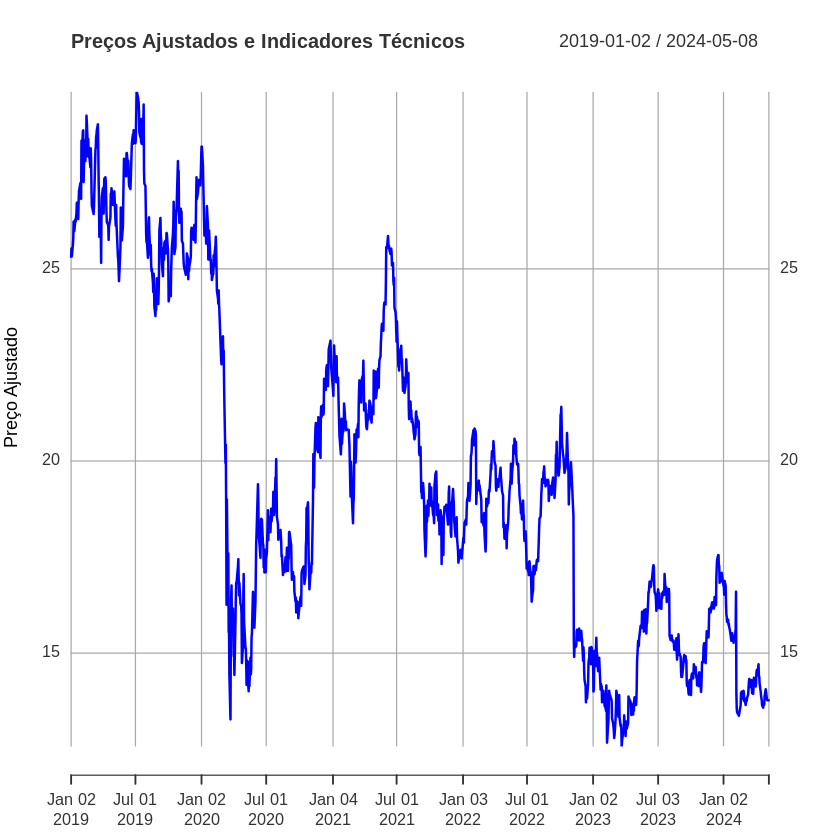

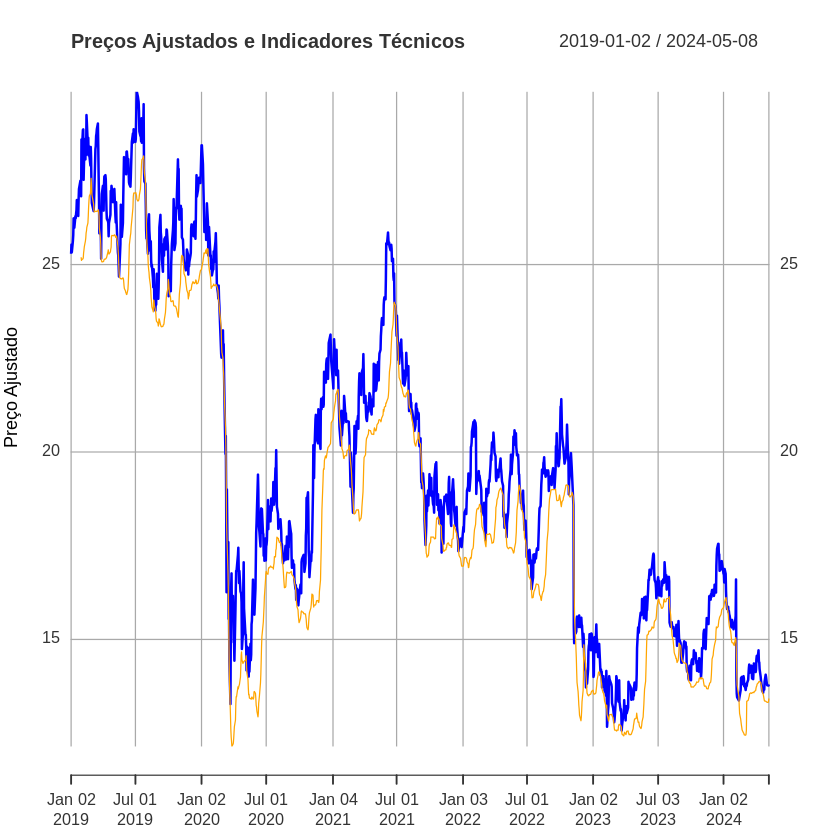

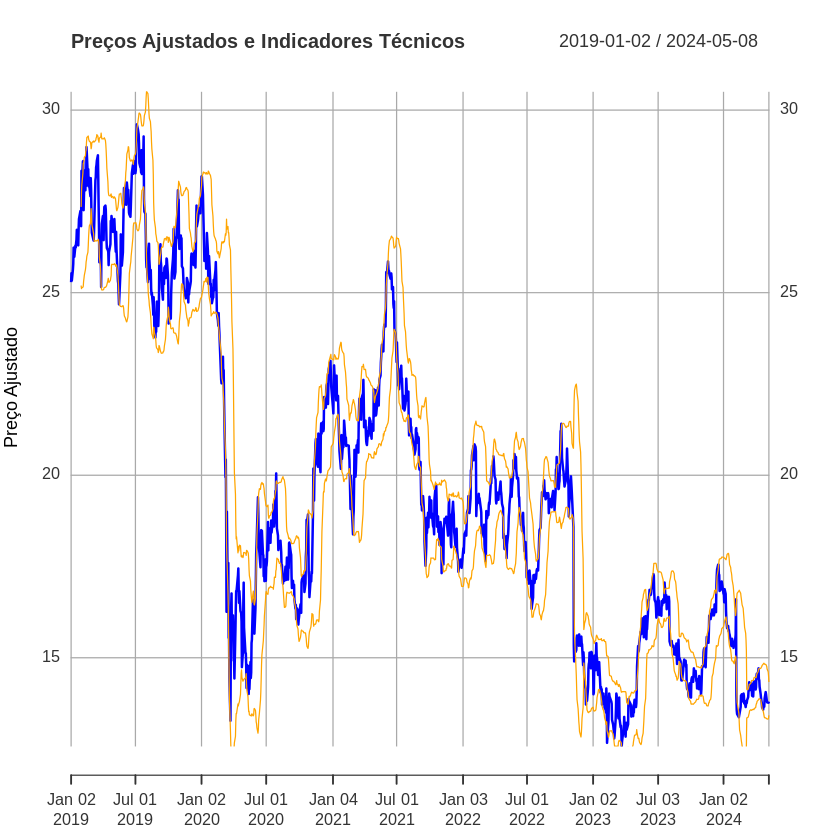

In [127]:
# Plotando os preços ajustados com médias móveis e envelopes de Bollinger
plot(precos_ajustados, type = "l", col = "blue", main = "Preços Ajustados e Indicadores Técnicos",
     ylab = "Preço Ajustado")
lines(BBDC4.SA$SMA20, col = "red")
lines(BBDC4.SA$SMA50, col = "green")
lines(BBDC4.SA$SDB, col = "orange")
lines(BBDC4.SA$SDT, col = "orange")

In [122]:
# Adicionando sugestões de compra e venda
# Se o preço cruzar acima da média móvel de curto prazo e estiver abaixo do envelope superior de Bollinger, é um sinal de compra
# Se o preço cruzar abaixo da média móvel de curto prazo e estiver acima do envelope inferior de Bollinger, é um sinal de venda
signals <- rep(NA, length(precos_ajustados))
signals[precos_ajustados > BBDC4.SA$SMA20 & precos_ajustados < BBDC4.SA$SDT] <- 1  # Compra
signals[precos_ajustados < BBDC4.SA$SMA20 & precos_ajustados > BBDC4.SA$SDB] <- -1  # Venda
points(precos_ajustados[signals == 1], col = "green", pch = 18)
points(precos_ajustados[signals == -1], col = "red", pch = 18)

ERROR: Error in idx[] <- idx[0]: replacement has length zero


**Visualização Plataforma B3**

**Gráfico com Médias Móveis de 20 e 50 dias (2024)**
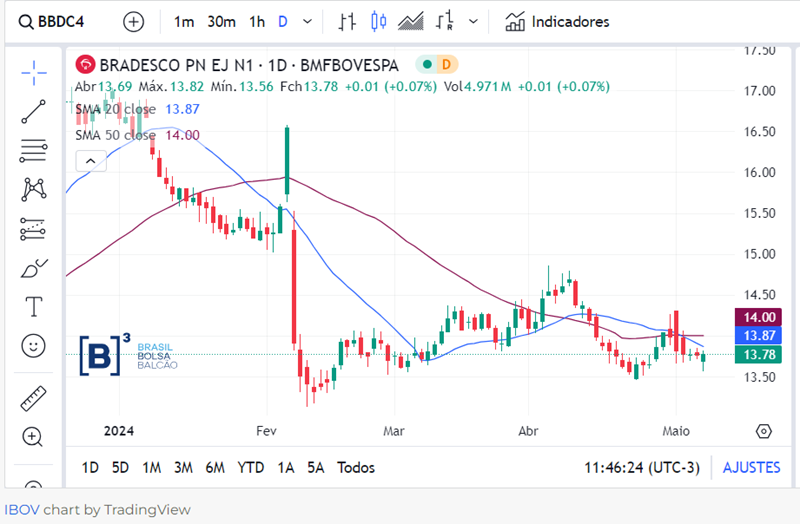

# Média móvel exponencial (EMA)

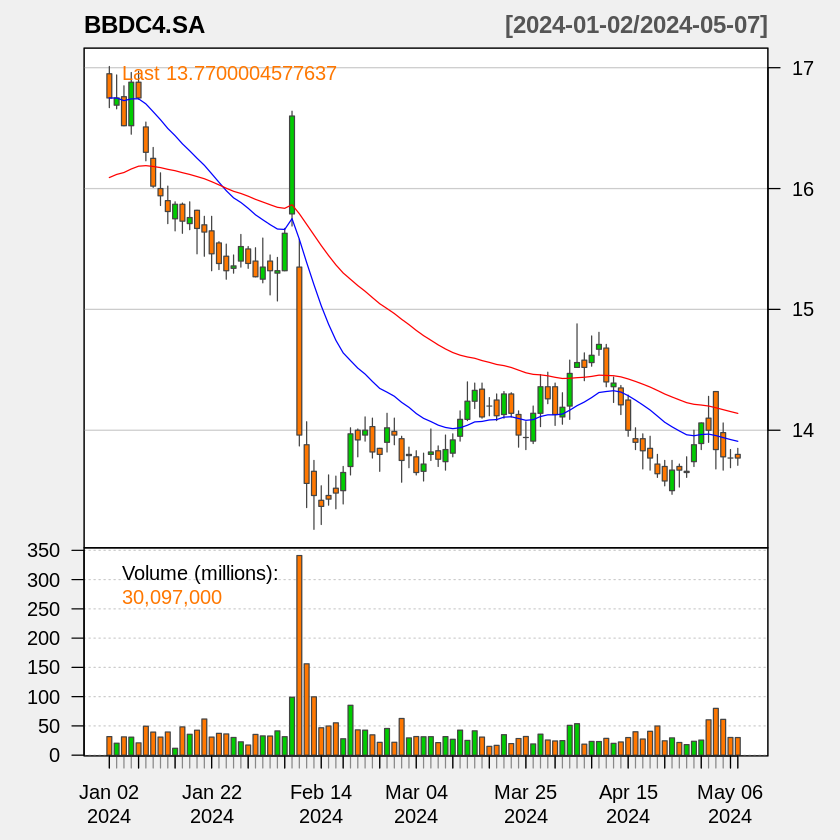

In [ ]:
# Adicionando médias exponenciais 20 e 50 dias
addEMA(n = c(20, 50), on = 1,col = c("blue", "red"))

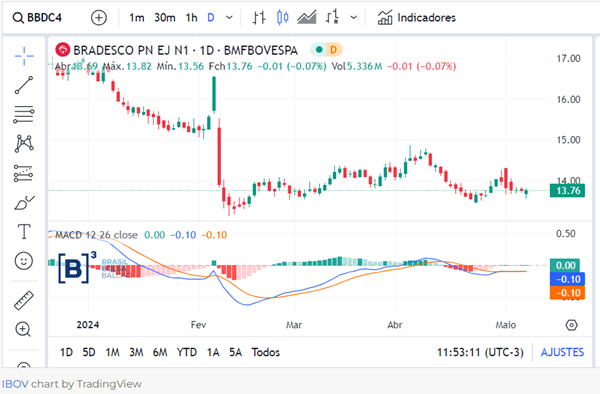**Visualização Plataforma B3**

**Gráfico com Médias Exponenciais de 9 e 26 dias (2024)**

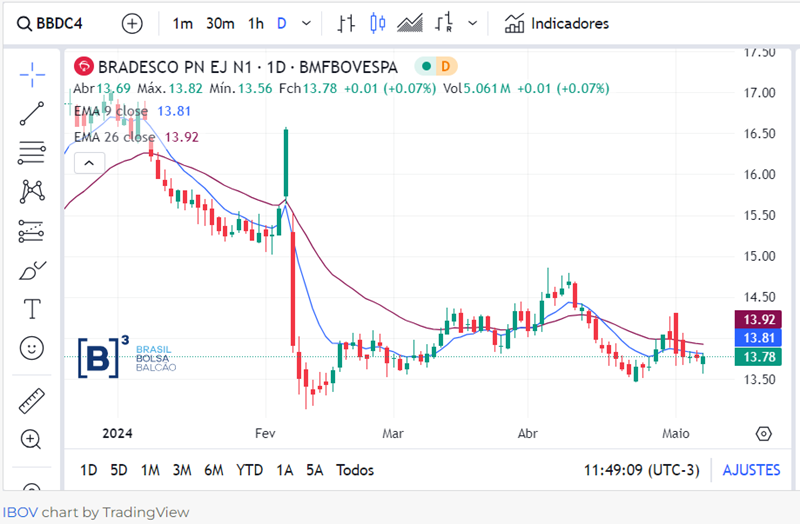


# Banda de Bollinger (BBands)

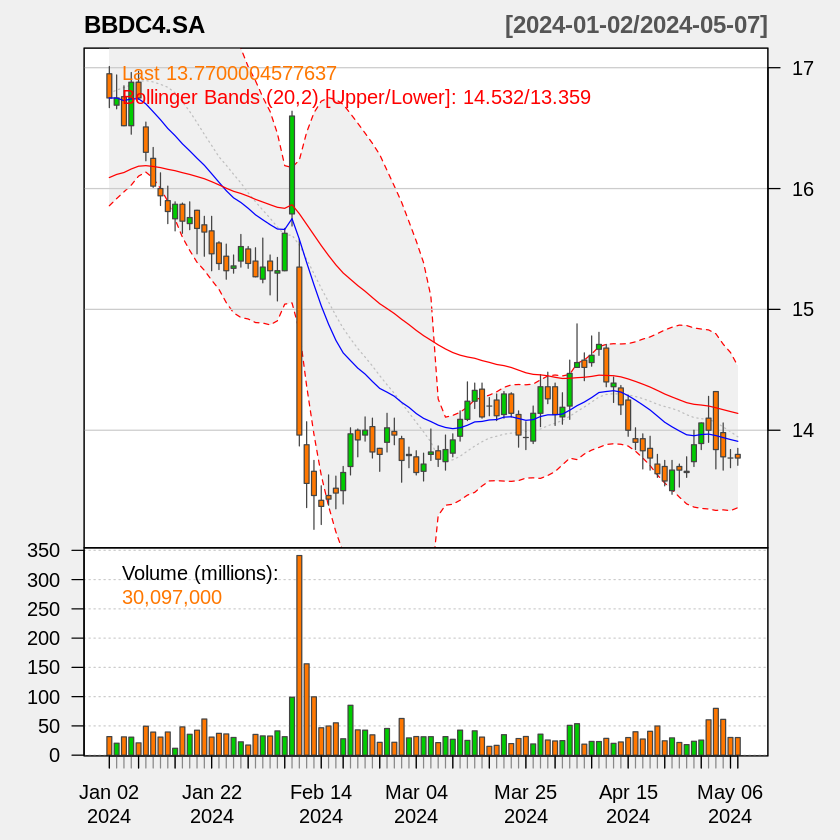

In [ ]:
# Banda de Bollinger
addBBands()

**Visualização Plataforma B3**

**Gráfico com Bandas de Bollinger de 20 dias e desvio padrão 2 (2024)**

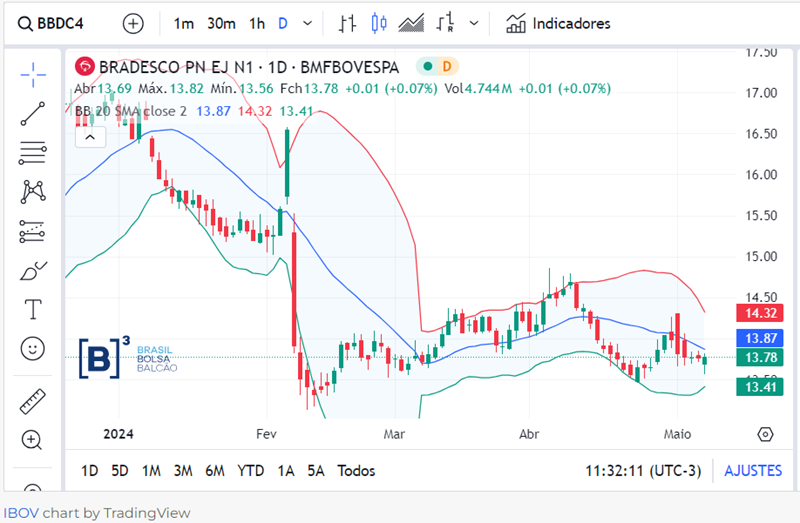

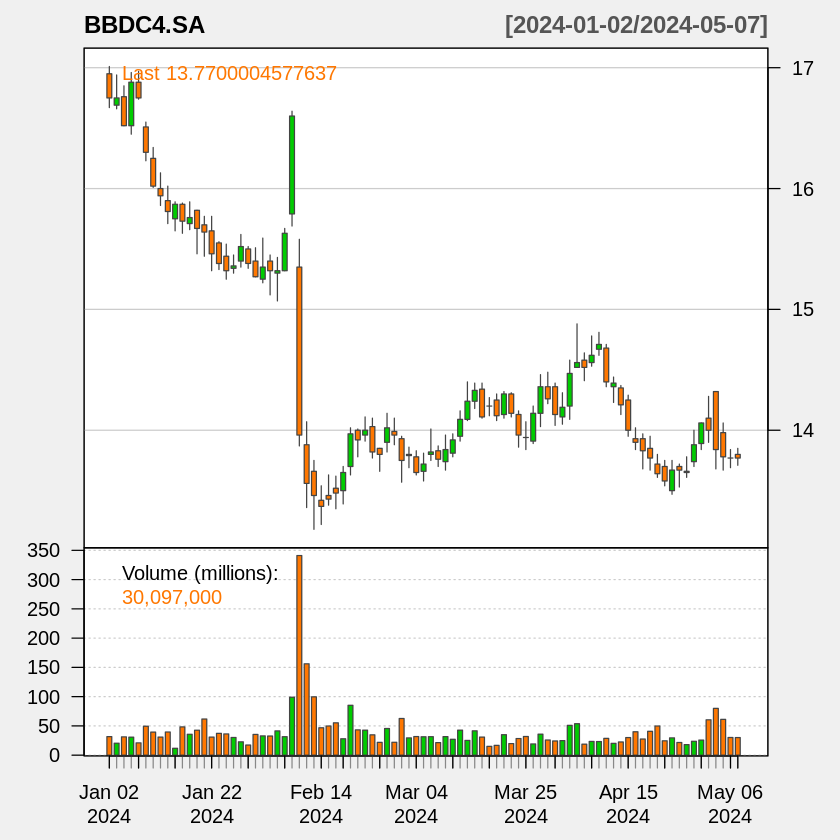

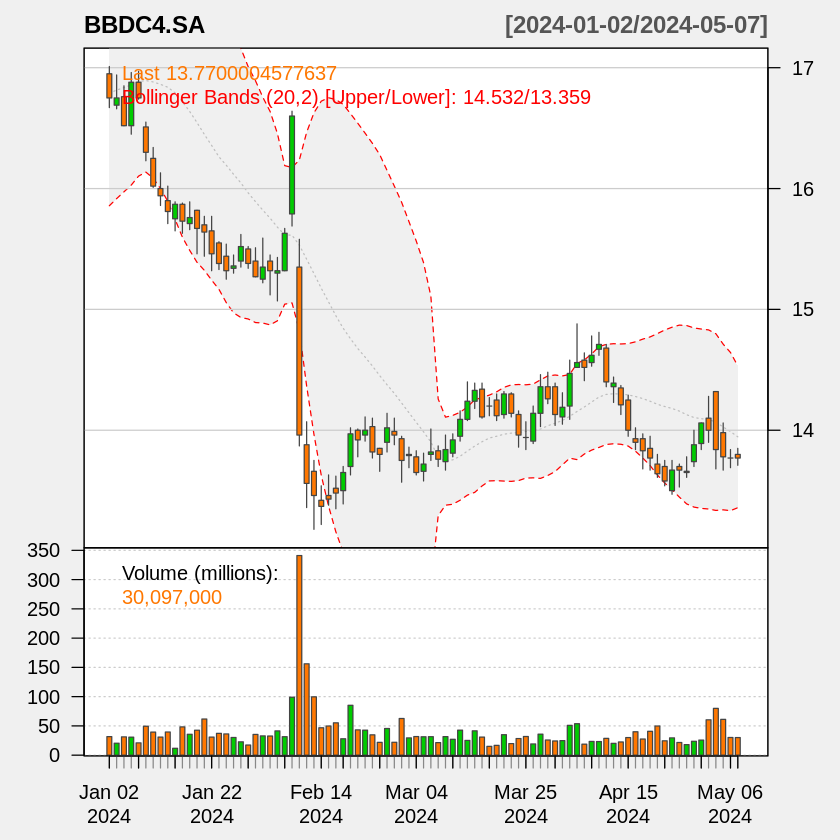

In [ ]:
chartSeries(BBDC4.SA,
            subset='2024-01::2024-05',
            theme=chartTheme('white'))
addBBands(n=20,sd=2)

**MACD**

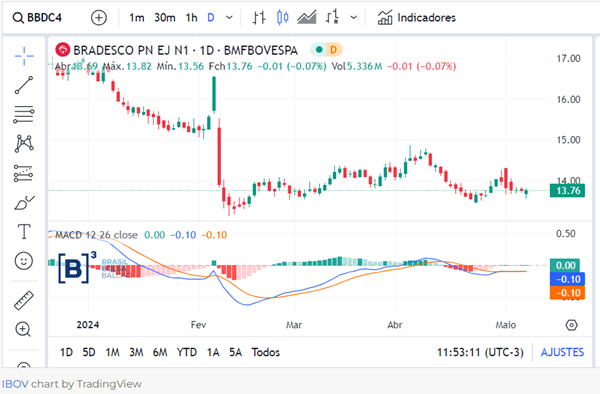

# Convergência/divergência da média móvel (MACD)

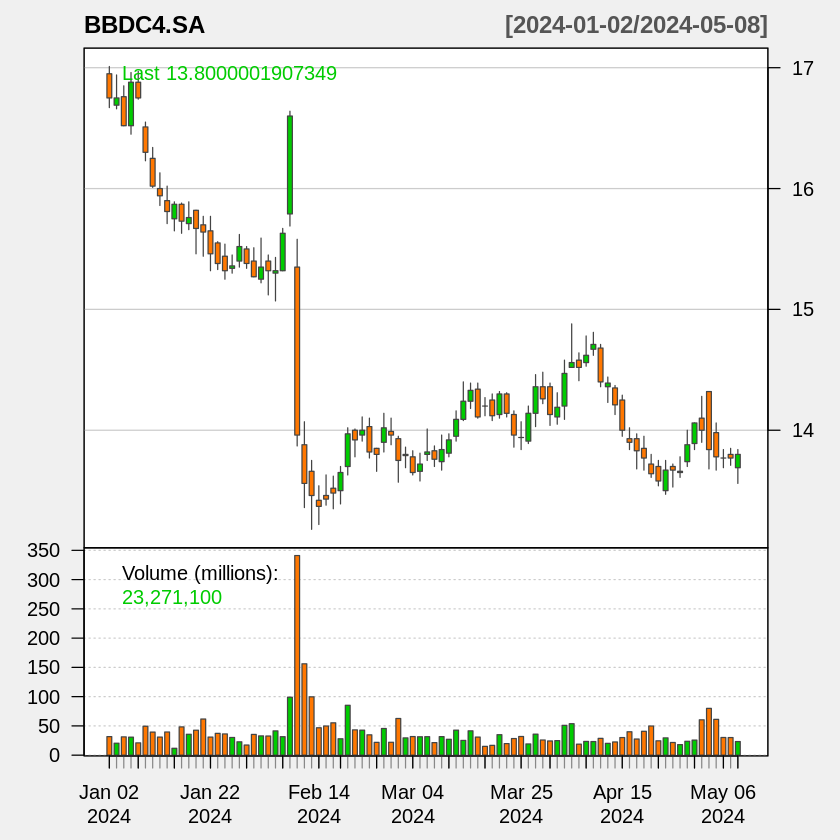

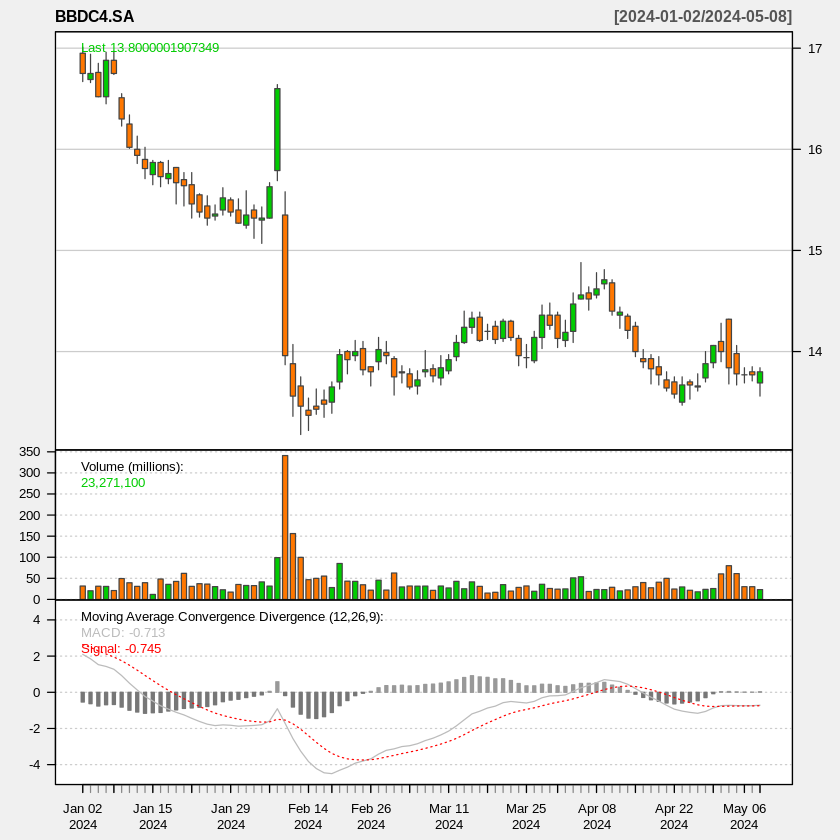

In [95]:
chartSeries(BBDC4.SA,
            subset='2024-01::2024-05',
            theme=chartTheme('white'))
addMACD(fast=12,slow=26,signal=9,type="EMA")

**Visualização Plataforma B3**

**MACD (2024)**

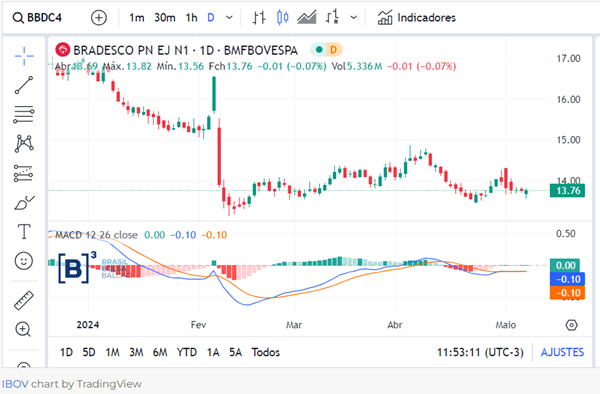

# Índice de Força Relativa (RSI)

In [ ]:
rsi <- RSI(Cl(BBDC4.SA), SMA, n=14)
tail(rsi,n=3)

                rsi
2024-05-03 34.75178
2024-05-06 40.49589
2024-05-07 44.14419

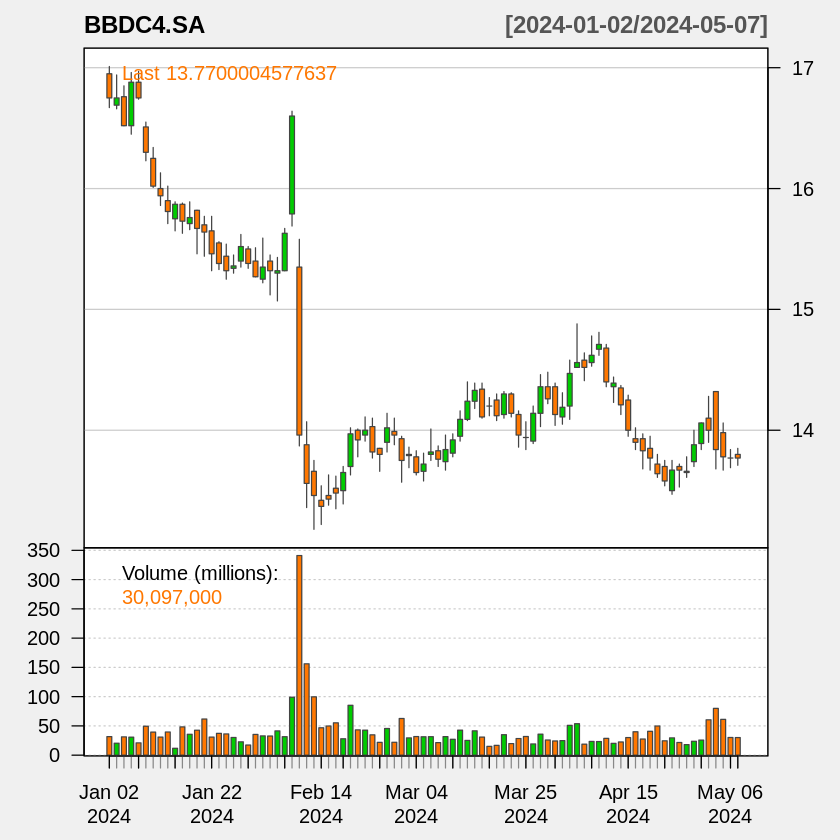

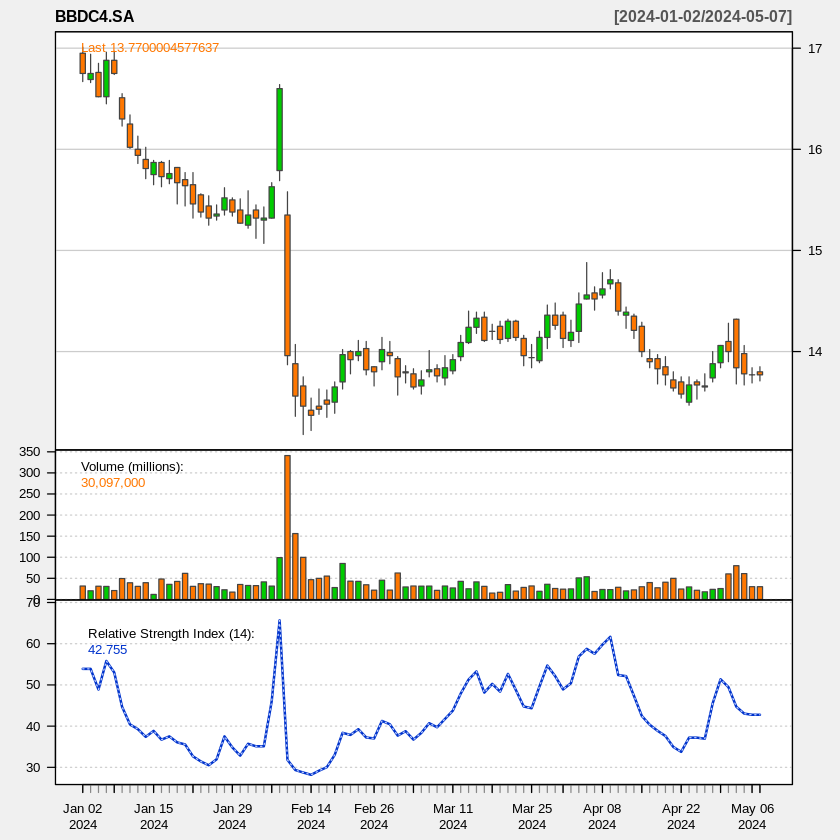

In [ ]:
chartSeries(BBDC4.SA,
            subset='2024-01::2024-05',
            theme=chartTheme('white'))
addRSI(n=14,maType="EMA")

**Visualização Plataforma B3**

**Gráfico RSI (2024)**

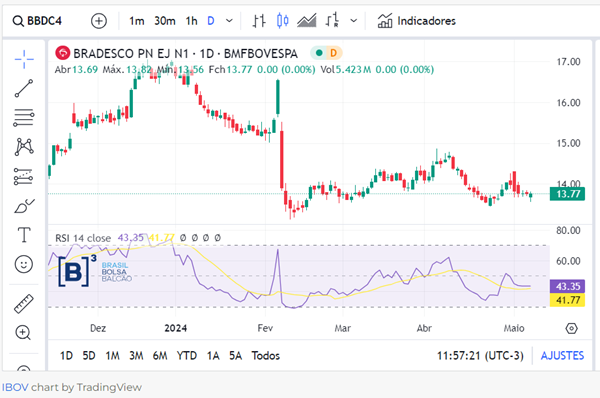

Sinal de negociação
```
O sinal de compra surge quando o ROC muda de negativo para positivo.
O sinal de venda surge quando o ROC muda de positivo para negativo.
```



# Taxa de Variação  (ROC)

In [ ]:
roc <- ROC(Cl(BBDC4.SA),type="discrete",n=2)
tail(roc,n=20)

           BBDC4.SA.Close
2024-04-09   0.0130853701
2024-04-10  -0.0150478980
2024-04-11  -0.0217538881
2024-04-12  -0.0131944157
2024-04-15  -0.0271021775
2024-04-16  -0.0218156523
2024-04-17  -0.0121428626
2024-04-18  -0.0093524579
2024-04-19  -0.0137382199
2024-04-22  -0.0137981502
2024-04-23   0.0021993939
2024-04-24   0.0066274045
2024-04-25  -0.0007315456
2024-04-26   0.0153621095
2024-04-29   0.0292826191
2024-04-30   0.0086455248
2024-05-02  -0.0156472447
2024-05-03  -0.0157143048
2024-05-06  -0.0050577814
2024-05-07  -0.0007256368

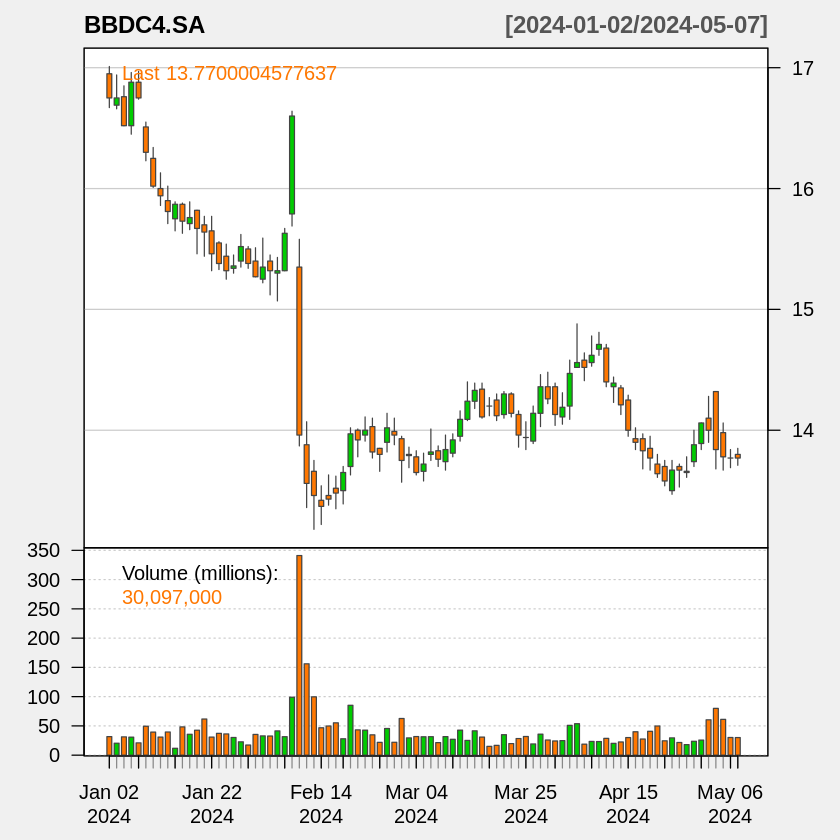

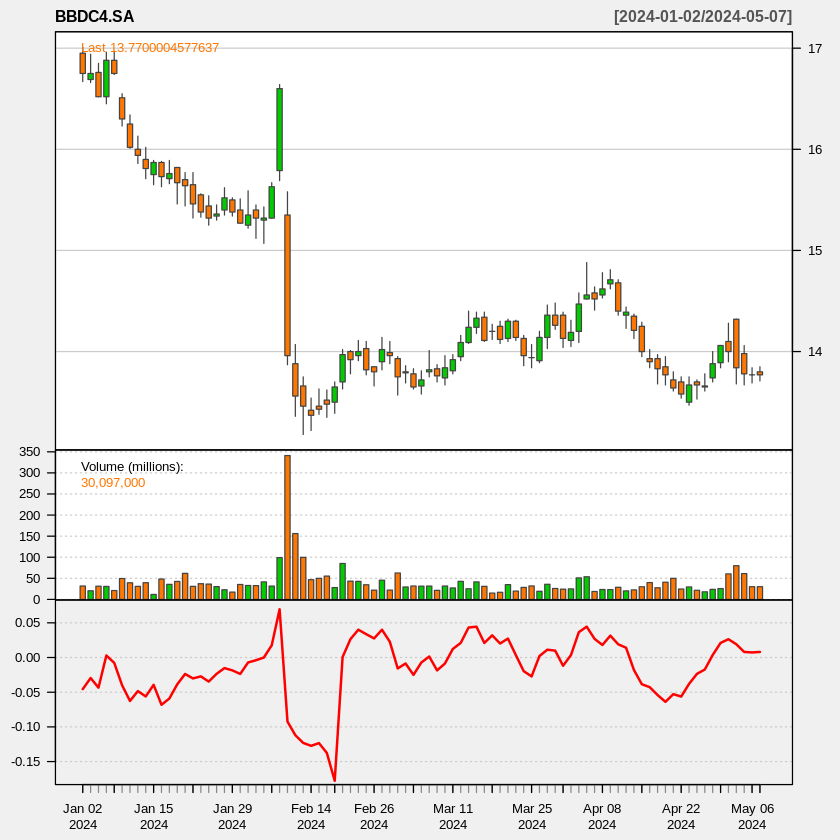

In [ ]:
chartSeries(BBDC4.SA,
            subset='2024-01::2024-005',
            theme=chartTheme('white'))
addROC(n=7)

**Visualização Plataforma B3**

**Gráfico com ROC (2024)**

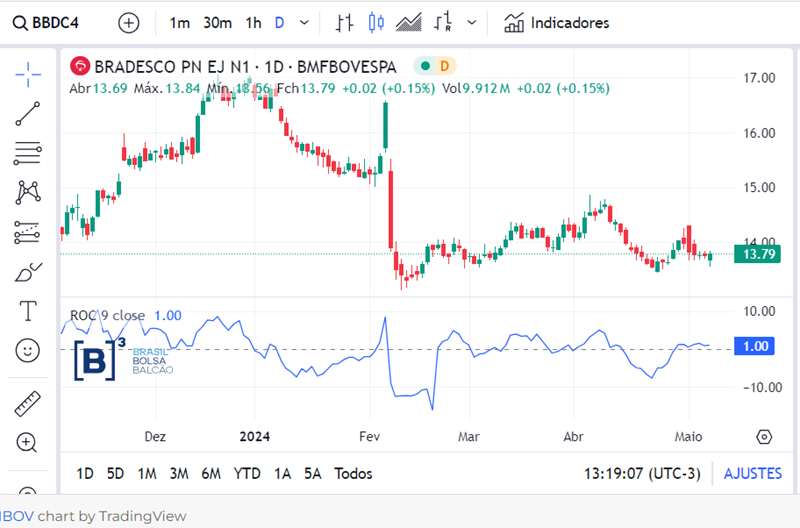